In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Dataset/bangla_online_comments_dataset.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Dataset/Approach to Social Media Cyberbullying and Harassment Detection Using Advanced Machine Learning.csv')

In [ ]:
df1.head()

,comment,Category,Gender,comment react number,label
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,Actor,Female,1.0,sexual
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Singer,Male,2.0,not bully
2,"অরে বাবা, এই টা কোন পাগল????",Actor,Female,2.0,not bully
3,ক্যাপ্টেন অফ বাংলাদেশ,Sports,Male,0.0,not bully
4,পটকা মাছ,Politician,Male,0.0,troll


In [ ]:
df2.head()

,Text,Label,Types
0,Ten outside soon doctor shake everyone treatme...,Not-Bullying,NaN
1,my life has come to a standstill and at this p...,Not-Bullying,NaN
2,girl this nigga make me sick to my stomach,Bullying,Ethnicity
3,I wanna fuck you,Bullying,Sexual
4,"Oh hey, you should be ashamed of your disgusti...",Not - Bullying,NaN


In [ ]:
df1.drop(columns=["Category", "Gender", "comment react number"],inplace=True)
df2.drop(columns=["Types"],inplace=True)

df1.rename(columns={"comment": "text", "label": "target"}, inplace=True)
df2.rename(columns={"Text": "text", "Label": "target"}, inplace=True)

# Merge vertically
merged_df = pd.concat([df1, df2], ignore_index=True)


# Reset index
merged_df.reset_index(drop=True, inplace=True)

# Save to new CSV file
merged_df.to_csv("merged_multilingual_sentiment_dataset.csv", index=False)

In [ ]:
df = pd.read_csv("merged_multilingual_sentiment_dataset.csv")

In [ ]:
df.head()

,text,target
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,sexual
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,not bully
2,"অরে বাবা, এই টা কোন পাগল????",not bully
3,ক্যাপ্টেন অফ বাংলাদেশ,not bully
4,পটকা মাছ,troll


In [ ]:
df.tail()

,text,target
52448,Please help this Christian nationalist battle ...,Bullying
52449,Has the Holy Quran ever been read by the membe...,Bullying
52450,And that is the difficulty - you need basic gu...,Bullying
52451,"As they will only encounter Muslim women, help...",Bullying
52452,"Never try to win. Not just politics, however. ...",Bullying


In [ ]:
df.columns

Index(['text', 'target'], dtype='object')

In [ ]:
df.shape

(52453, 2)

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize

# Tokenization function
def tokenize_text(text):
    return word_tokenize(text)

# Apply tokenization to the 'text' column
df['tokens'] = df['text'].apply(tokenize_text)

# Display the first few rows with tokenized text
df[['text', 'tokens']].tail()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,text,tokens
52448,Please help this Christian nationalist battle ...,"[Please, help, this, Christian, nationalist, b..."
52449,Has the Holy Quran ever been read by the membe...,"[Has, the, Holy, Quran, ever, been, read, by, ..."
52450,And that is the difficulty - you need basic gu...,"[And, that, is, the, difficulty, -, you, need,..."
52451,"As they will only encounter Muslim women, help...","[As, they, will, only, encounter, Muslim, wome..."
52452,"Never try to win. Not just politics, however. ...","[Never, try, to, win, ., Not, just, politics, ..."


In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# Load the stopwords list for English (you can change the language if needed)
stop_words = set(stopwords.words('english'))

# Function to remove stop words from tokens
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Apply the function to remove stop words
df['filtered_tokens'] = df['tokens'].apply(remove_stopwords)

# Display the result
df[['text', 'tokens', 'filtered_tokens']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,tokens,filtered_tokens
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,"[ওই, হালার, পুত, এখন, কি, মদ, খাওয়ার, সময়, র...","[ওই, হালার, পুত, এখন, কি, মদ, খাওয়ার, সময়, র..."
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,"[ঘরে, বসে, শুট, করতে, কেমন, লেগেছে, ?, ক্যামের...","[ঘরে, বসে, শুট, করতে, কেমন, লেগেছে, ?, ক্যামের..."
2,"অরে বাবা, এই টা কোন পাগল????","[অরে, বাবা, ,, এই, টা, কোন, পাগল, ?, ?, ?, ?]","[অরে, বাবা, ,, এই, টা, কোন, পাগল, ?, ?, ?, ?]"
3,ক্যাপ্টেন অফ বাংলাদেশ,"[ক্যাপ্টেন, অফ, বাংলাদেশ]","[ক্যাপ্টেন, অফ, বাংলাদেশ]"
4,পটকা মাছ,"[পটকা, মাছ]","[পটকা, মাছ]"


In [ ]:
import nltk
nltk.download('wordnet') # Download wordnet resource

from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Apply lemmatization to the filtered tokens
df['lemmatized_tokens'] = df['filtered_tokens'].apply(lemmatize_tokens)

# Display the result
df[['text', 'filtered_tokens', 'lemmatized_tokens']].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,text,filtered_tokens,lemmatized_tokens
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,"[ওই, হালার, পুত, এখন, কি, মদ, খাওয়ার, সময়, র...","[ওই, হালার, পুত, এখন, কি, মদ, খাওয়ার, সময়, র..."
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,"[ঘরে, বসে, শুট, করতে, কেমন, লেগেছে, ?, ক্যামের...","[ঘরে, বসে, শুট, করতে, কেমন, লেগেছে, ?, ক্যামের..."
2,"অরে বাবা, এই টা কোন পাগল????","[অরে, বাবা, ,, এই, টা, কোন, পাগল, ?, ?, ?, ?]","[অরে, বাবা, ,, এই, টা, কোন, পাগল, ?, ?, ?, ?]"
3,ক্যাপ্টেন অফ বাংলাদেশ,"[ক্যাপ্টেন, অফ, বাংলাদেশ]","[ক্যাপ্টেন, অফ, বাংলাদেশ]"
4,পটকা মাছ,"[পটকা, মাছ]","[পটকা, মাছ]"


In [ ]:
df['target'].unique()

array(['sexual', 'not bully', 'troll', 'religious', 'threat',
       'Not-Bullying', 'Bullying', 'Not - Bullying', 'Bullying ',
       'Not Bullying ', 'Not- Bullying ', 'Not -Bullying',
       'Not-Bullying ', 'Not -Bullying ', 'Not bullying ', 'Bullying.',
       'Not-Bulyying', 'Not-Bulllying', 'Bullyiing', 'Not-Bulying',
       'Not- Bullying', 'Bullyibg', 'Bullying  ', nan, 'Bullyinfg'],
      dtype=object)

In [ ]:
def categorize(value):
    bullying_keywords = ['sexual', 'troll', 'threat', 'religious', 'Bullying']
    # Check if value is a string before applying lower()
    if isinstance(value, str):
        if any(keyword in value.lower() for keyword in bullying_keywords):
            return 'Bullying'
    # Return 'Not Bullying' for non-string values or if keywords are not found
    return 'Not Bullying'

# Assuming you want to apply this to the 'target' column of your DataFrame:
binary_series = df['target'].apply(categorize)

# Display the result
print(binary_series)

0            Bullying
1        Not Bullying
2        Not Bullying
3        Not Bullying
4            Bullying
             ...     
52448    Not Bullying
52449    Not Bullying
52450    Not Bullying
52451    Not Bullying
52452    Not Bullying
Name: target, Length: 52453, dtype: object


In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
types_le = LabelEncoder()
df['le_type'] = types_le.fit_transform(df['target'])
df.head()

,text,target,tokens,filtered_tokens,lemmatized_tokens,le_type
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,sexual,"[ওই, হালার, পুত, এখন, কি, মদ, খাওয়ার, সময়, র...","[ওই, হালার, পুত, এখন, কি, মদ, খাওয়ার, সময়, র...","[ওই, হালার, পুত, এখন, কি, মদ, খাওয়ার, সময়, র...",21
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,not bully,"[ঘরে, বসে, শুট, করতে, কেমন, লেগেছে, ?, ক্যামের...","[ঘরে, বসে, শুট, করতে, কেমন, লেগেছে, ?, ক্যামের...","[ঘরে, বসে, শুট, করতে, কেমন, লেগেছে, ?, ক্যামের...",19
2,"অরে বাবা, এই টা কোন পাগল????",not bully,"[অরে, বাবা, ,, এই, টা, কোন, পাগল, ?, ?, ?, ?]","[অরে, বাবা, ,, এই, টা, কোন, পাগল, ?, ?, ?, ?]","[অরে, বাবা, ,, এই, টা, কোন, পাগল, ?, ?, ?, ?]",19
3,ক্যাপ্টেন অফ বাংলাদেশ,not bully,"[ক্যাপ্টেন, অফ, বাংলাদেশ]","[ক্যাপ্টেন, অফ, বাংলাদেশ]","[ক্যাপ্টেন, অফ, বাংলাদেশ]",19
4,পটকা মাছ,troll,"[পটকা, মাছ]","[পটকা, মাছ]","[পটকা, মাছ]",23


target
0    28347
1    24104
Name: count, dtype: int64


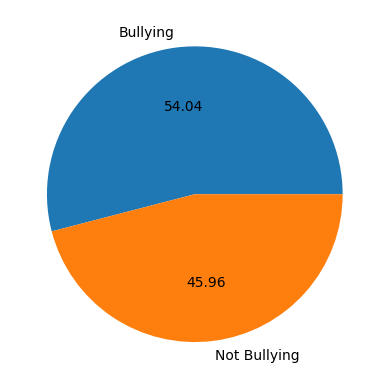

In [ ]:
print(df['target'].value_counts())
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['Bullying','Not Bullying'],autopct="%0.2f")
plt.show()

<Axes: xlabel='target'>

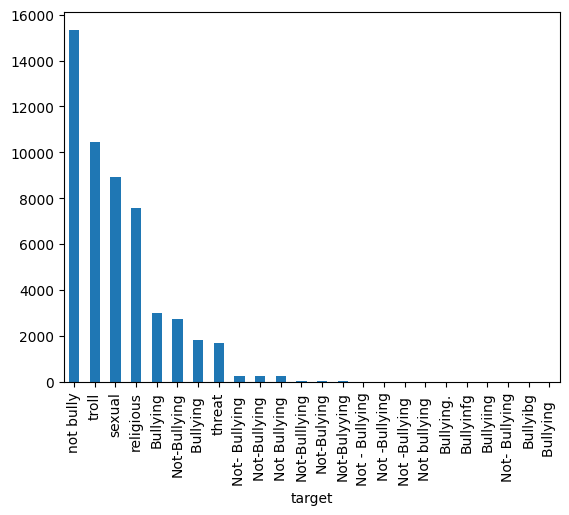

In [ ]:
df['target'].value_counts().plot(kind="bar")

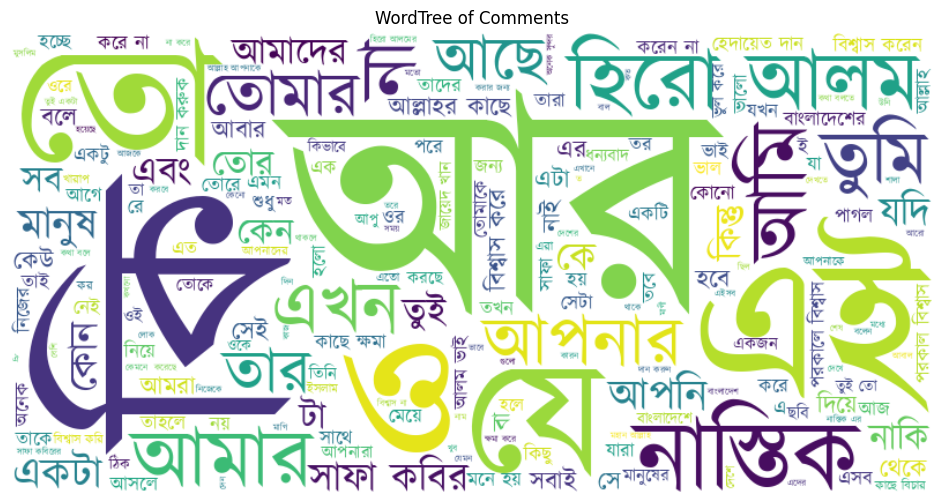

In [ ]:
def generate_wordcloud(text_column, df):
    # Keep only the relevant text column
    df = df[[text_column]].dropna()

    # Text preprocessing function
    def preprocess_text(text):
        text = str(text).lower()  # Convert to lowercase
        text = re.sub(r'[^a-zA-Z\u0980-\u09FF\s]', '', text)  # Remove special characters (supports Bangla characters)
        return text

    df['cleaned_comment'] = df[text_column].apply(preprocess_text)

    # Combine all comments into a single text
    text_data = ' '.join(df['cleaned_comment'])

    # Generate a WordTree
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                          regexp=r'[\u0980-\u09FF]+', font_path="kalpurush.ttf").generate(text_data)  # Bangla font needed

    # Display the WordTree
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("WordTree of Comments")
    plt.show()

def plot_ngrams(text_column, df):

    pass
generate_wordcloud('text', df)
plot_ngrams('text', df)

In [ ]:
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Load the dataset
# Ensure 'df' is the DataFrame containing your dataset

# Clean the dataset to focus on 'text' and 'target' columns
df = df[['text', 'target']].dropna()  # Assuming 'new_df' is the name of your DataFrame

# Convert labels into binary (bullying vs. non-bullying)
bullying_labels = ['sexual', 'troll','threat', 'Bullying']  # Define bullying-related labels
df['target'] = df['target'].apply(lambda x: 1 if x in bullying_labels else 0)  # 1: Bullying, 0: Not Bullying

# Text preprocessing function
def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\u0980-\u09FF\s]', '', text)  # Remove special characters (supports Bangla characters)
    return text

# Preprocess the 'text' column
df['cleaned_comment'] = df['text'].apply(preprocess_text)

# Splitting data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_comment'], df['target'], test_size=0.2, random_state=42)

# Convert text data to numerical format using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Check the shape of transformed data
print(X_train_tfidf.shape, X_test_tfidf.shape)


(41960, 14890) (10491, 14890)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define different models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naïve Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine (SVM)": SVC(kernel='linear')
}

# Train and evaluate each model
results = {}

for model_name, model in models.items():
    print(f"\nTraining and Evaluating: {model_name}")
    model.fit(X_train_tfidf, y_train)  # Train model
    y_pred = model.predict(X_test_tfidf)  # Predict on test data

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    results[model_name] = {"Accuracy": accuracy, "Report": classification_rep}

    # Print results
    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", classification_rep)




Training and Evaluating: Logistic Regression
Accuracy: 0.7259555809741683
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.78      0.75      5607
           1       0.73      0.66      0.69      4884

    accuracy                           0.73     10491
   macro avg       0.73      0.72      0.72     10491
weighted avg       0.73      0.73      0.72     10491


Training and Evaluating: Naïve Bayes
Accuracy: 0.7164236011819655
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75      5607
           1       0.72      0.64      0.68      4884

    accuracy                           0.72     10491
   macro avg       0.72      0.71      0.71     10491
weighted avg       0.72      0.72      0.71     10491


Training and Evaluating: Decision Tree
Accuracy: 0.6870651034219808
Classification Report:
               precision    recall  f1-score   support

        

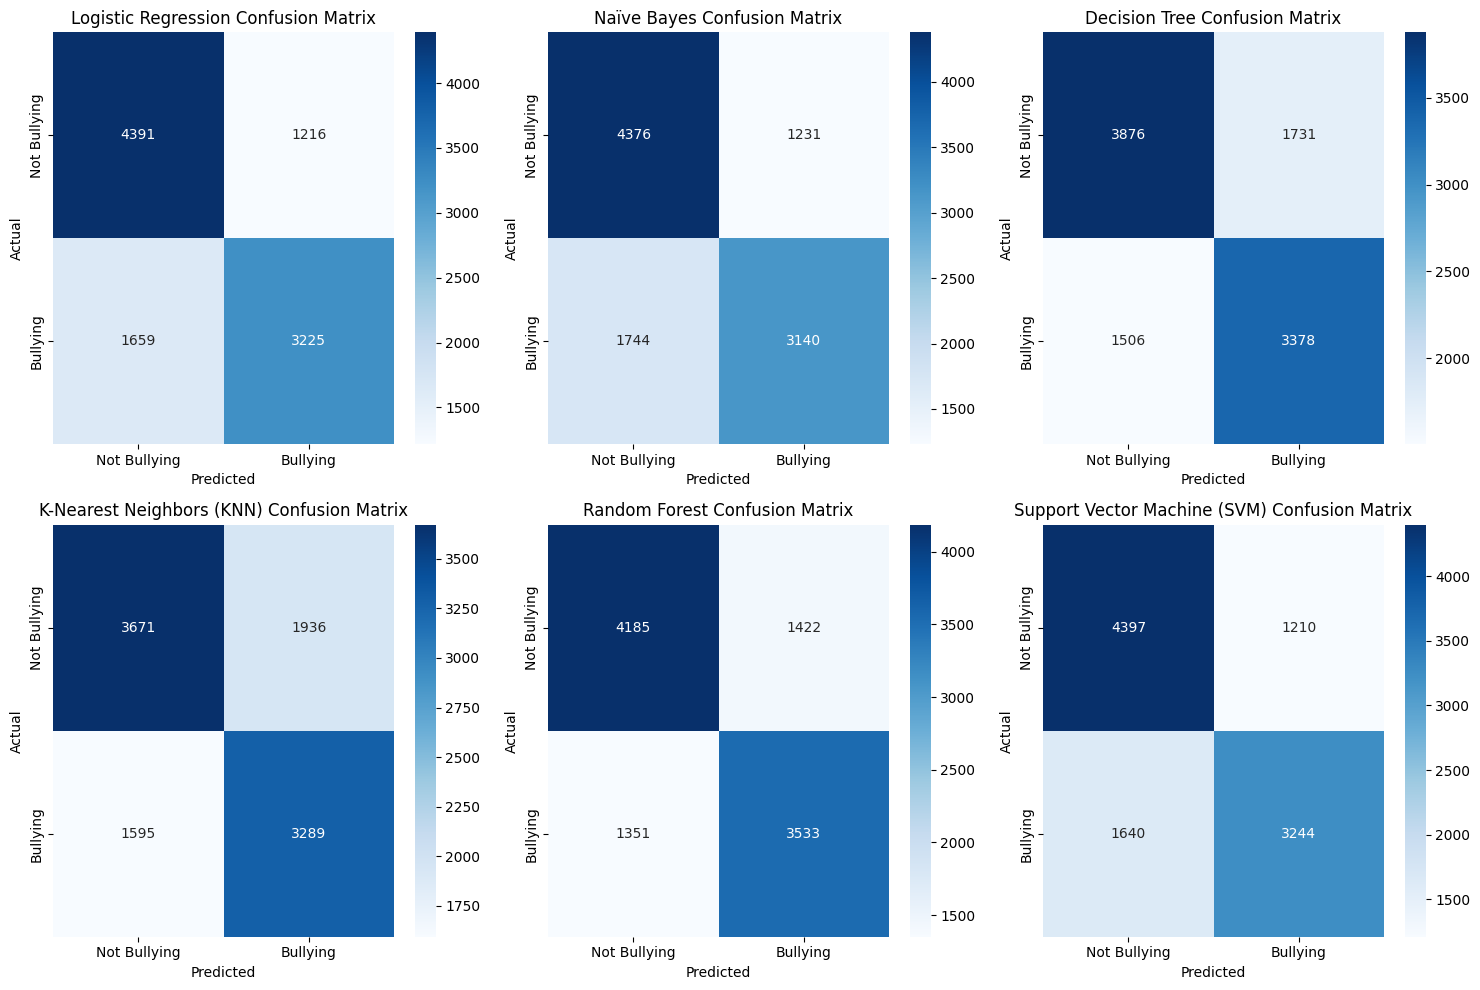

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define different models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naïve Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine (SVM)": SVC(kernel='linear')
}

# Train, evaluate, and plot confusion matrix for each model
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, (model_name, model) in enumerate(models.items()):
    model.fit(X_train_tfidf, y_train)  # Train model
    y_pred = model.predict(X_test_tfidf)  # Predict on test data

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Not Bullying", "Bullying"],
                yticklabels=["Not Bullying", "Bullying"], ax=axes[i])
    axes[i].set_title(f"{model_name} Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

# Adjust layout
plt.tight_layout()
plt.show()



<ipython-input-45-26557d7a5345>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='coolwarm')


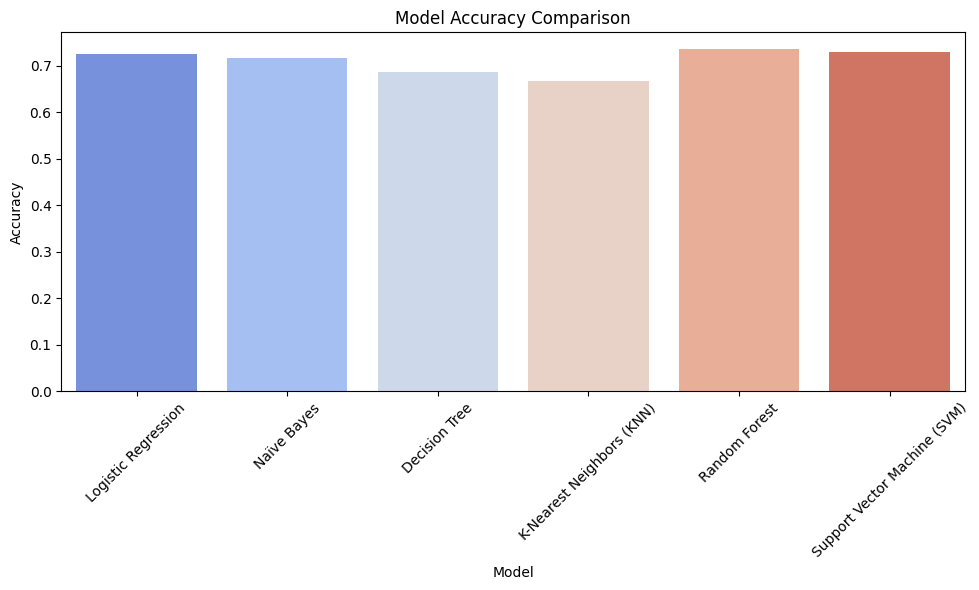

In [ ]:
import matplotlib.pyplot as plt

# Assuming the 'results' dictionary is already populated after model training
accuracy_data = {model_name: result['Accuracy'] for model_name, result in results.items()}

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='coolwarm')



plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()



In [ ]:
import joblib

# Train the model (choose any model from the previous ones)
model = LogisticRegression()  # Example: Logistic Regression
model.fit(X_train_tfidf, y_train)  # Train model

# Save the trained model and vectorizer to disk
joblib.dump(model, "cyberbullying_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")  # Save the vectorizer as well
print("Model and vectorizer saved successfully!")

# Load the saved model and vectorizer
loaded_model = joblib.load("cyberbullying_model.pkl")
loaded_vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Test loading by predicting on a sample comment
sample_comment = ["you are ugly"]
sample_comment_tfidf = loaded_vectorizer.transform(sample_comment)  # Convert to TF-IDF using loaded vectorizer
prediction = loaded_model.predict(sample_comment_tfidf)

print("Prediction for sample comment:", "Bullying" if prediction[0] == 1 else "Not Bullying")




Model and vectorizer saved successfully!
Prediction for sample comment: Bullying


In [ ]:
import pickle

# Assuming `model` is your trained machine learning model (e.g., Logistic Regression)
# And `vectorizer` is your fitted TF-IDF vectorizer # This is the main change, using 'vectorizer' instead of 'tfidf_vectorizer'

# Save the trained model
with open('bullying_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file) # This is the main change, using 'vectorizer' instead of 'tfidf_vectorizer'

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!


In [ ]:
import pickle

# Load the trained model
with open('bullying_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Load the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as vectorizer_file:
    tfidf_vectorizer = pickle.load(vectorizer_file)

print("Model and vectorizer loaded successfully!")


Model and vectorizer loaded successfully!


In [ ]:
"""
import pickle

# Load the trained model and TF-IDF vectorizer
model = pickle.load(open('bullying_model.pkl', 'rb'))
tfidf_vectorizer = pickle.load(open('tfidf_vectorizer.pkl', 'rb'))

# Test prediction on a known input
test_input = "you are black guy"
text_vectorized = tfidf_vectorizer.transform([test_input])
prediction = model.predict(text_vectorized)

Prediction: {prediction[0]}

if prediction[0]:
    print("Prediction: Bullying")
else:
    print("Prediction: Not Bullying")
"""


Prediction: Bullying
